In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [123]:
mall_data=pd.read_csv("../Mall_Customers.csv")

In [124]:
mall_data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [125]:
mall_data.isna().sum().to_frame()
mall_data=mall_data.rename(columns={'Genre':'Gender'})
mall_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
lbl=LabelEncoder()
mall_data['Gender']=lbl.fit_transform(mall_data['Gender'])
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [128]:
from sklearn.cluster import KMeans

In [129]:
to_play = mall_data.iloc[:, [2, 4]].values

In [130]:
WCSS = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(to_play)
    WCSS.append(kmeans.inertia_)

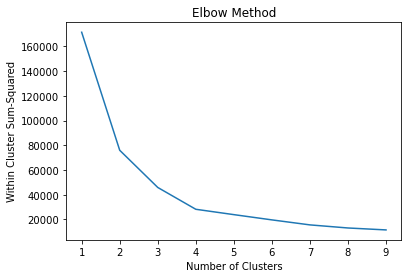

In [131]:
plt.plot(range(1, 10), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum-Squared')
plt.show()


In [132]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10)
ind_kmeans = kmeans.fit_predict(to_play)

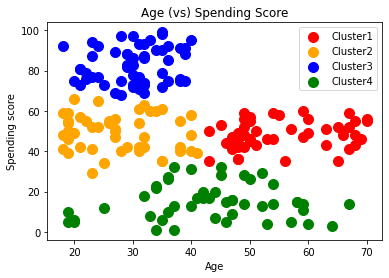

In [133]:
plt.scatter(to_play[ind_kmeans == 0, 0], to_play[ind_kmeans == 0, 1], s = 100, c = 'Red', label = 'Cluster1')
plt.scatter(to_play[ind_kmeans == 1, 0], to_play[ind_kmeans == 1, 1], s = 100, c = 'Orange', label = 'Cluster2')
plt.scatter(to_play[ind_kmeans == 2, 0], to_play[ind_kmeans == 2, 1], s = 100, c = 'Blue', label = 'Cluster3')
plt.scatter(to_play[ind_kmeans == 3, 0], to_play[ind_kmeans == 3, 1], s = 100, c = 'Green', label = 'Cluster4')
plt.title('Age (vs) Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()
plt.show()